<a href="https://colab.research.google.com/github/pharringtonp19/business-analytics/blob/main/notebooks/regression/mvrt_class_partAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/pharringtonp19/business-analytics.git

Cloning into 'business-analytics'...
remote: Enumerating objects: 1126, done.
remote: Counting objects: 100% (743/743), done.
remote: Compressing objects: 100% (296/296), done.
remote: Total 1126 (delta 523), reused 601 (delta 422), pack-reused 383 (from 1)
Receiving objects: 100% (1126/1126), 20.23 MiB | 22.04 MiB/s, done.
Resolving deltas: 100% (651/651), done.


### **Import Packages**

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import jax.numpy as jnp
import jax
import seaborn as sb
from functools import partial

### **Read In Data Set**

In [4]:
df = pd.read_csv('/content/business-analytics/datasets/CASchools.csv')
df['Students_per_Teacher'] = df['students'] / df['teachers']
df.head()

,Unnamed: 0,district,school,county,grades,students,teachers,calworks,lunch,computer,expenditure,income,english,read,math,Students_per_Teacher
0,1,75119,Sunol Glen Unified,Alameda,KK-08,195,10.900000,0.510200,2.040800,67,6384.911133,22.690001,0.000000,691.599976,690.000000,17.889909
1,2,61499,Manzanita Elementary,Butte,KK-08,240,11.150000,15.416700,47.916698,101,5099.380859,9.824000,4.583333,660.500000,661.900024,21.524664
2,3,61549,Thermalito Union Elementary,Butte,KK-08,1550,82.900002,55.032299,76.322601,169,5501.954590,8.978000,30.000002,636.299988,650.900024,18.697225
3,4,61457,Golden Feather Union Elementary,Butte,KK-08,243,14.000000,36.475399,77.049202,85,7101.831055,8.978000,0.000000,651.900024,643.500000,17.357143
4,5,61523,Palermo Union Elementary,Butte,KK-08,1335,71.500000,33.108601,78.427002,171,5235.987793,9.080333,13.857677,641.799988,639.900024,18.671329


### **Question #1**

In [5]:
linear_model = smf.ols('math ~ Students_per_Teacher', data=df)

### **Question #2**

In [7]:
results1 = linear_model.fit()

### **Question #3**

In [8]:
def model1(params, x):
  return params[0] + params[1]*x

### **Question #4**

In [9]:
xs = jnp.linspace(df['Students_per_Teacher'].min(), df['Students_per_Teacher'].max(), 1000)

### **Question #5**

In [11]:
f = partial(model1, results1.params.values)
ys = jax.vmap(f)(xs)

### **Question #6**

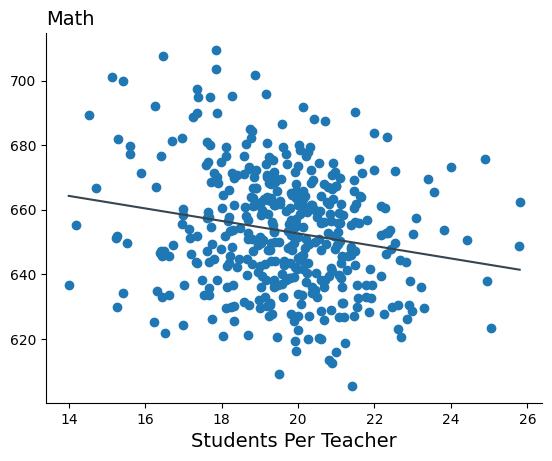

In [12]:
plt.plot(xs, ys, color="#36454F")
plt.scatter(df['Students_per_Teacher'], df['math'])
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xlabel('Students Per Teacher', size=14)
plt.title('Math', loc='left', size=14)
plt.show()

### **Question #7**

In [33]:
income_bins = pd.cut(
    df['income'],
    bins=[df['income'].min(), df['income'].quantile(0.25), df['income'].quantile(0.5), df['income'].quantile(0.75), df['income'].max()],
    labels=['0-25%', '25-50%', '50-75%', '75-100%']
)

data = pd.DataFrame({
    'Students_per_Teacher': df['Students_per_Teacher'],
    'Math': df['math'],
    'income': df['income'],  # Including 'income' for additional hover info
    'income_bin': income_bins
})

fig = px.scatter(
    data,
    x='Students_per_Teacher',
    y='Math',
    color='income_bin',
    labels={'income_bin': 'Income Bin', 'Students_per_Teacher': 'Students per Teacher', 'Math': 'Math Score'},
    hover_data={'income': True, 'Students_per_Teacher': True, 'Math': True, 'income_bin': True}
)

fig.update_layout(
    title="Math Score",
    xaxis_title="Students per Teacher",
    yaxis_title="",
    legend_title="Income Bins",
    xaxis=dict(
        title=dict(
            text="Students per Teacher",
            font=dict(size=16)  # Adjust this value as needed
        )
    )
)
fig.update_yaxes(range=[df['math'].min(), df['math'].max()])
fig.update_xaxes(range=[df['Students_per_Teacher'].min(), df['Students_per_Teacher'].max()])
fig.show()

### **Question # 8**

In [14]:
linear_model2 = smf.ols('math ~ Students_per_Teacher + income', data=df)
results2 = linear_model2.fit()

### **Question #9**

In [15]:
results = [results1, results2]
summary_col(results)

,math I,math II
Intercept,691.4174,632.6867
,(9.3825),(7.4893)
Students_per_Teacher,-1.9386,-0.3474
,(0.4755),(0.3563)
income,,1.7941
,,(0.0933)
R-squared,0.0382,0.4903
R-squared Adj.,0.0359,0.4879


### **Question #10**

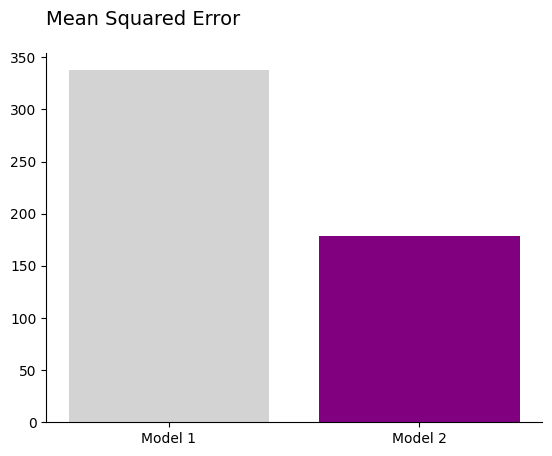

In [65]:
mse_values = [np.mean(results1.resid**2), np.mean(results2.resid**2)]
model_names = ['Model 1', 'Model 2']
plt.bar(model_names, mse_values, color=['lightgrey', 'purple'])
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Mean Squared Error', loc='left', size=14, pad=20)
plt.show()

### **Question #11**

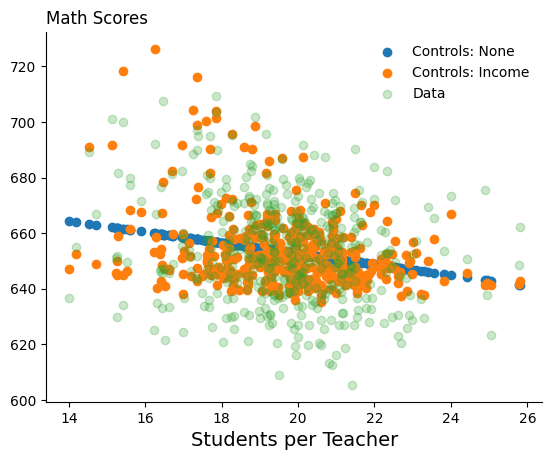

In [64]:
plt.scatter(df['Students_per_Teacher'], results1.fittedvalues, label='Controls: None')
plt.scatter(df['Students_per_Teacher'], results2.fittedvalues, label='Controls: Income')
plt.scatter(df['Students_per_Teacher'], df['math'], label='Data', alpha=0.25)
plt.legend(frameon=False)
plt.xlabel("Students per Teacher", size=14)
plt.title("Math Scores", loc='left')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

### **Question #12**  

In [16]:
def model2(params, x, z):
  return params[0] + params[1]*x + params[2]*z

### **Question #13**

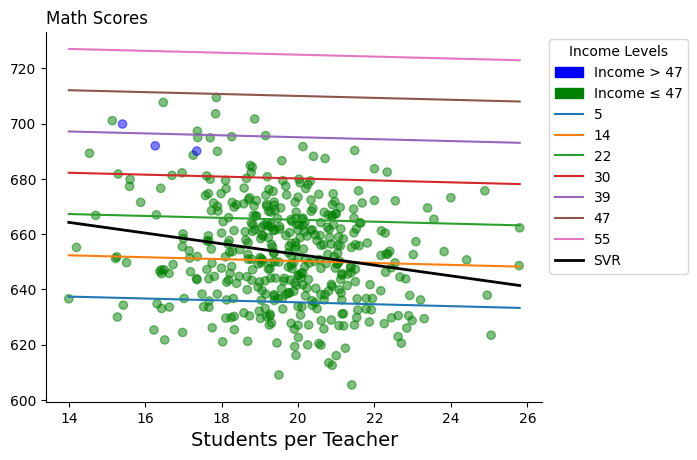

In [55]:
incs = np.linspace(df['income'].min(), df['income'].max(), 7)
f = partial(model2, results2.params.values)
xs = np.linspace(df['Students_per_Teacher'].min(), df['Students_per_Teacher'].max(), 100)
colors = df['income'].map(lambda x: 'blue' if x > 47 else 'green')
plt.scatter(df['Students_per_Teacher'], df['math'], alpha=0.5, c = colors)
for inc in incs:
    g = partial(f, z=inc)
    ys = jax.vmap(g)(xs)
    plt.plot(xs, ys, label=f'{inc:.0f}')
plt.plot(xs, jax.vmap(partial(model1, results1.params.values))(xs), color='black', label='SVR', linewidth=2)

### DON'T WORRY ABOUT THIS ###
import matplotlib.patches as mpatches
blue_patch = mpatches.Patch(color='blue', label='Income > 47')
green_patch = mpatches.Patch(color='green', label='Income ≤ 47')

plt.legend(handles=[blue_patch, green_patch] + plt.gca().get_legend_handles_labels()[0],
           title='Income Levels', bbox_to_anchor=(1.0, 1), loc='upper left')

# Other plot settings
plt.xlabel("Students per Teacher", size=14)
plt.title("Math Scores", loc='left')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

In [70]:
print(f"Correlation Coefficient Math-Income: {df['math'].corr(df['income']):.3f}")
print(f"Correlation Coefficient Student Per Teacher-Income: {df['Students_per_Teacher'].corr(df['income']):.3f}")

Correlation Coefficient Math-Income: 0.699
Correlation Coefficient Student Per Teacher-Income: -0.232
